# Brazil's Covid-19 spread


### Introduction
    
   Covid-19 is a virus originated from china. It's impact on the world is unquestionable. This notebook will try to analyse it's propagation in Brazil comparing with Italy and US, where the viruses impact is, by the time this notebook is written, more chaotic. <br>
   In order to help people and prevent this disease from spreading endlessly, I will be comparing both countries, using Foursquare api for mapping and intregrating it to the dateset already imported to maximize our accuracy of how would the virus spread in Brazil's territory, then we will be capable of elaborating solutions.<br>
   All the data in this notebook will be from March 17th 2020.

## Dataset

    Italy dataset. Available on: 
    https://github.com/pcm-dpc/COVID-19/blob/master/dati-regioni/dpc-covid19-ita-regioni-20200317.csv
    
    Global dataset ( I will be using only US data from this one ). Available on:
    Confirmed cases:
    https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
    Death cases:
    https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv
    Recovery cases:
    https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv
    
    
## features

### Global dataset

1. Province/State
 * Province or state
 * type: String
2. Country/Region
 * Country
 * type: String
3. Dates
 * Every date since the beginning
 * type: Date
4. Lat
 * Latitude
 * type: Decimal
5. Long
 * Longitude
 * type: Decimal
 
### Italy dataset

1. Date
 * Date of infection
 * type: Date
2. Country_Region
 * Country
 * type: String 
3. Province_State
 * Province or state
 * type: String
4. Case_Type
 * Status:
       1. Active
       2. Confirmed
       3. Deaths
       4. Recovered
 * type: String
5. Cases
 * type: Int
6. Difference
 * type: Int
7. Prep_Flow_Runtime
 * Dataset insert datetime
 * type: Datetime
8. Latest_Date
 * Latest insert date
 * type: Date



## Import used libraries

In [225]:
# Imports
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns


#!pip install folium # Uncomment in case of error
import folium
from folium import plugins
from folium.plugins import HeatMap

print("\nImports successfully")


Imports successfully


### Global data
Importing global dataset

In [76]:
confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,53,59,70,75,82,114,147,177
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,502,511,581,639,639,701,773,839,825,878
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,150,160,178,178,200,212,226,243,266
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,99,117,129,149,149,197,238,428,566,673


In [77]:
print("Shape: ",confirmed_df.shape)

Shape:  (460, 60)


In [89]:
death_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,10,10,15,16,19,22,22,27,29
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [90]:
print("Shape: ",death_df.shape)

Shape:  (460, 60)


In [91]:
recovery_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")
recovery_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,33,34,34,35,35,35,35,41
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,76,76,101,118,118,118,118,118,144,144
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,96,96,97,105,105,109,114
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,24,24,24,26,26,26,35,42,42,49


In [92]:
print("Shape: ",recovery_df.shape)

Shape:  (460, 60)


## Clean global data 
Getting US data from global data<br>
Clean missing values

In [98]:
# Last date from US dataset
last_date_update = confirmed_df.columns.to_list()[-1]
last_date_update


'3/17/20'

In [94]:
US_confirmed_df = confirmed_df.loc[confirmed_df['Country/Region']=='US']
US_confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,0,0,267,366,442,568,572,643,904,1076
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,0,0,173,220,328,421,525,732,967,1706
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,0,0,144,177,221,282,340,426,557,698
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,0,0,92,95,108,123,138,164,197,218
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,45,45,46,46,46,46,46,46,47,47


In [95]:
US_death_df = death_df.loc[death_df['Country/Region']=='US']
US_death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,0,0,23,29,31,37,37,40,48,55
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,0,0,0,0,0,0,2,3,10,13
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,0,0,2,3,4,4,5,6,7,12
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
US_recovery_df = recovery_df.loc[recovery_df['Country/Region']=='US']
US_recovery_df.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,0,0,2,2,6,6,6,6,6,6
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,Grand Princess,US,37.6489,-122.6655,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,Georgia,US,33.0406,-83.6431,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,Colorado,US,39.0598,-105.3111,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,Florida,US,27.7663,-81.6868,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,New Jersey,US,40.2989,-74.5210,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [124]:
US_confirmed_df['Lat'] = US_confirmed_df['Lat'].astype(float)
US_confirmed_df['Long'] = US_confirmed_df['Long'].astype(float)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


# Data visualization

In [198]:
US_coo = [39.0598, -95.3111]
heat_data = [[[row['Lat'],row['Long']]]*row[last_date_update] for index, row in US_confirmed_df.iterrows()]

map_hooray = folium.Map(location=US_coo,
                    zoom_start = 5) 

heat_df = []
for i in heat_data:
    for c in i:
        heat_df.append(c)

HeatMap(heat_df).add_to(map_hooray)

#map_hooray

In [308]:
# Get dates
not_used_columns = ['Province/State','Country/Region','Lat','Long']
dates = set(US_confirmed_df.columns.to_list()) - set(not_used_columns)

dates = list(dates)

dates.sort(key=lambda date: datetime.datetime.strptime(date, "%m/%d/%y"))

dates = dates[-8:]

In [284]:
states = US_confirmed_df['Province/State'].to_list()
states[0:6]

['Washington',
 'New York',
 'California',
 'Massachusetts',
 'Diamond Princess',
 'Grand Princess']

In [285]:
cases = {}
for state in states:
    cases[state] = {}
    for date in dates:
        value = US_confirmed_df.loc[US_confirmed_df['Province/State'] == state][date].values[0]
        if value != 0:
            cases[state][date] = value

In [307]:
#cases

Let's plot the number of confirmed cases in 'Washington', 'New York', 'California', 'Massachusetts', 'Georgia', 'Colorado', 'Florida'

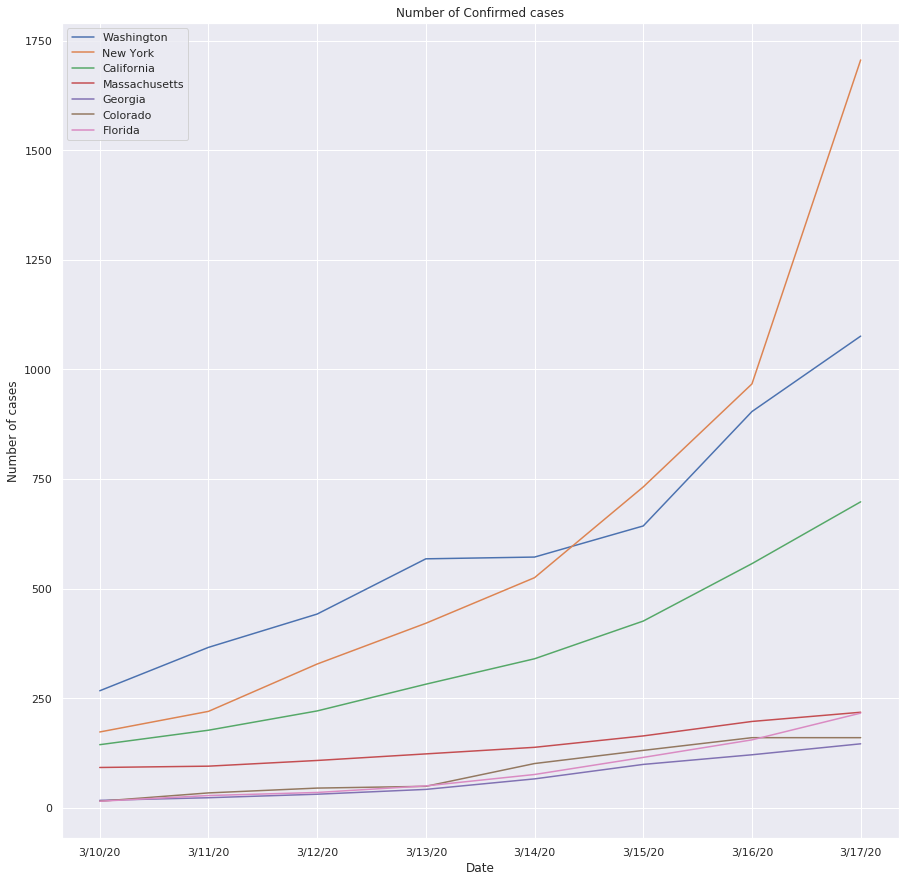

In [324]:
plt.figure(figsize=(15,15))

plt_states = ['Washington', 'New York', 'California', 'Massachusetts', 'Georgia', 'Colorado', 'Florida']

for key in plt_states:
    #x = list(cases[key].keys())
    #y = list(cases[key].values())
    lists = cases[key].items()
    try:
        x, y = zip(*lists)
    except:
        pass
    plt.plot(x, y)
    plt.legend(plt_states)

#Set descriptions:
plt.title("Number of Confirmed cases")
plt.ylabel('Number of cases')
plt.xlabel('Date')
    
plt.show()

In only 7 day, New york cases went from 173 to 1706, almost 10 times

Now, let's compare deaths in the state of Washington with the number of confirmed cases

In [316]:
state_wash = 'Washington'
legend = ['Confirmed', 'Deaths']
deaths_wash = {}
for date in dates:
        value = US_death_df.loc[US_death_df['Province/State'] == state_wash][date].values[0]
        if value != 0:
            deaths_wash[date] = value

In [317]:
deaths_wash

{'3/10/20': 23,
 '3/11/20': 29,
 '3/12/20': 31,
 '3/13/20': 37,
 '3/14/20': 37,
 '3/15/20': 40,
 '3/16/20': 48,
 '3/17/20': 55}

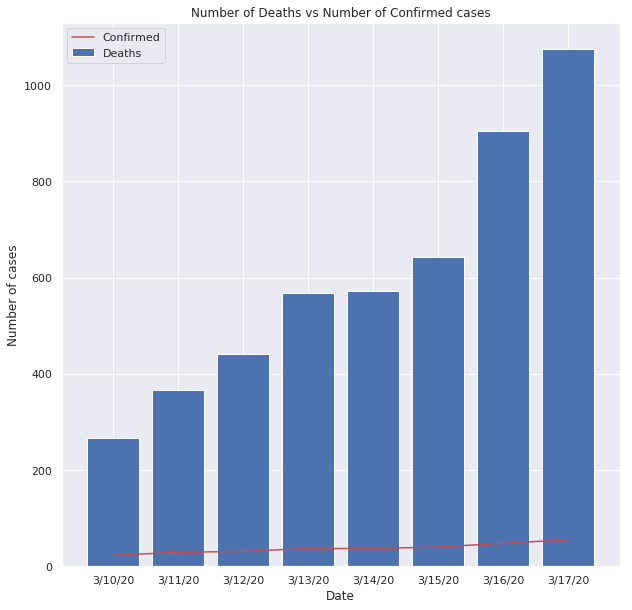

In [328]:
lists = cases[state_wash].items()


plt.figure(figsize=(10,10))

try:
    x, y = zip(*lists)
except:
    pass
plt.bar(x, y)
lists = deaths_wash.items()
try:
    x, y = zip(*lists)
except:
    pass
plt.plot(x, y, color='r')

#Set descriptions:
plt.title("Number of Deaths vs Number of Confirmed cases")
plt.ylabel('Number of cases')
plt.xlabel('Date')
plt.legend(legend)

plt.show()

In [ ]:
$

##  Data analysis